In [4]:
from collections import namedtuple
from random import randint


# Using equation y = x

# default values
num_points = 100
dimensions = 2

x_start = 0
x_end = 100
y_start = 0
y_end = 100

margin = 1

# object to use for points on graph
Point = namedtuple('Point', ['x', 'y', 'value'])

# Object to model perceptron
class Perceptron:
    def __init__(self, dimensions):
        self.dimensions = dimensions
        self.weights = [0 for __ in range(dimensions)]
    
    def sign(self, *x):
        if len(x) != len(self.weights):
            raise ValueError
        
        total = 0
        for val, weight in zip(x, self.weights):
            total += val * weight
        
        return 1 if total > 0 else -1
    
# Generate points given number of points to generate and a margin
def generate_points(n, x_s, x_e, y_s, y_e, margin):
    # Initial generation
    points = [Point(randint(x_s, x_e), randint(y_s, y_e), 1) for __ in range(n)]
    
    # Fix margins
    for i in range(len(points)):
        while abs(points[i].x - points[i].y) < margin:
            points[i] = Point(randint(x_s, x_e), randint(y_s, y_e), 1)
            
    # Set correct values
    for i in range(len(points)):
        if points[i].x > points[i].y:
            points[i] = Point(points[i].x, points[i].y, 1)
        else:
            points[i] = Point(points[i].x, points[i].y, -1)
    
    return points

# Discovering relationship between optimal line and 

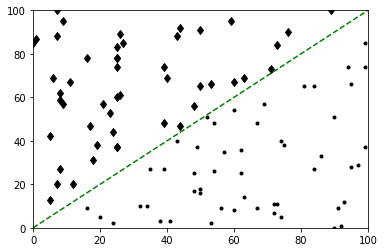

In [5]:
import matplotlib.pyplot as plt

points = generate_points(
    num_points, 
    x_start, 
    x_end, 
    y_start, 
    y_end, 
    margin
)

# Show initial unchecked points and line
plt.axis([x_start, x_end, y_start, y_end])
for point in points:
    plt.plot(point.x, point.y, 'k.' if point.value == 1 else 'kd')
plt.plot([x_start, x_end], [y_start, y_end], 'g--')
plt.show()

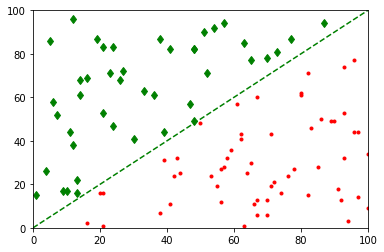

In [7]:
# Need to check each point in perceptron, show it.

percep = Perceptron(dimensions)

plt.axis([x_start, x_end, y_start, y_end])

for point in points:
    choice = percep.sign(point.x, point.y)
    drawing = ''
    drawing += 'g' if choice == point.value else 'r'
    drawing += '.' if point.value == 1 else 'd'
    plt.plot(point.x, point.y, drawing)
    
plt.plot([x_start, x_end], [y_start, y_end], 'g--')
plt.show()